In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


In [2]:
test_data = pd.read_csv('../data/test_data.csv')

In [3]:
X_test = test_data.drop(columns=['prognosis'])
y_test = test_data['prognosis']

In [13]:

def evaluate_model(model, X_test, y_test, le):
    # Convert string labels to encoded values
    label_to_index = {v: k for k, v in le.items()}
    y_test_encoded = np.array([label_to_index[label] for label in y_test])
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # if they are tensors convert them to numpy arrays
    y_pred = y_pred.numpy() if hasattr(y_pred, 'numpy') else y_pred
    y_pred_proba = y_pred_proba.numpy() if hasattr(y_pred_proba, 'numpy') else y_pred_proba
    
    # Binarize the labels for one-vs-all
    y_test_bin = label_binarize(y_test_encoded, classes=range(len(le)))
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(le)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute PR curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(le)):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])
    
    # Plot ROC curves
    plt.figure(figsize=(5, 4))
    for i in range(len(le)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{list(le.values())[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    # plt.legend(loc="lower right")
    plt.show()
    
    # Plot PR curves
    plt.figure(figsize=(5, 4))
    for i in range(len(le)):
        plt.plot(recall[i], precision[i], lw=2, label=f'{list(le.values())[i]} (AP = {average_precision[i]:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    # plt.legend(loc="lower left")
    plt.show()
    
    # convert encoded values in y_pred back to string labels
    # print(y_pred)
    # print(y_test)
    y_pred_str = np.array([le[i] for i in y_pred])
    # print(y_pred_str)
    # Compute additional performance metrics
    accuracy = accuracy_score(y_test, y_pred_str)
    macro_f1 = f1_score(y_test, y_pred_str, average='macro')
    weighted_f1 = f1_score(y_test, y_pred_str, average='weighted')
    macro_precision = precision_score(y_test, y_pred_str, average='macro')
    macro_recall = recall_score(y_test, y_pred_str, average='macro')
        
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro F1 Score: {macro_f1:.4f}")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
        
    print("\nClass-wise performance metrics:")
    for i, label in enumerate(le.values()):
        class_precision = precision_score(y_test, y_pred_str, average=None)[i]
        class_recall = recall_score(y_test, y_pred_str, average=None)[i]
        class_f1 = f1_score(y_test, y_pred_str, average=None)[i]
        print(f"{label}:")
        print(f"  Precision: {class_precision:.4f}")
        print(f"  Recall: {class_recall:.4f}")
        print(f"  F1-score: {class_f1:.4f}")
        print(f"  ROC AUC: {roc_auc[i]:.4f}")
        print(f"  PR AUC: {average_precision[i]:.4f}")
        print()


# Naive Bayes

In [5]:
# load the model
nb_model = joblib.load('../Model/saved_models/naive_bayes_model.pkl')
le = joblib.load('../Model/saved_models/label_mapping.joblib')
le = {v: k for k, v in le.items()} # reverse the dict so that I can go from index to label


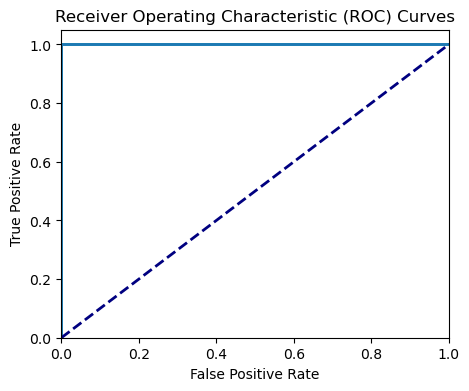

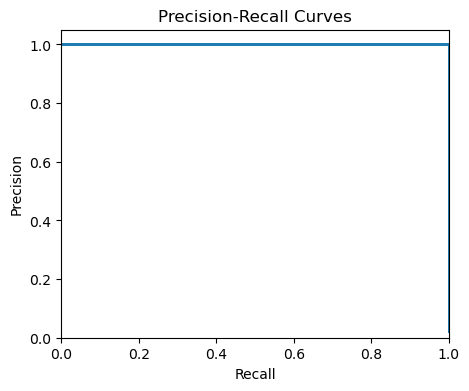

Accuracy: 1.0000
Macro F1 Score: 1.0000
Macro Precision: 1.0000
Macro Recall: 1.0000

Class-wise performance metrics:
(vertigo) Paroymsal  Positional Vertigo:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

AIDS:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Acne:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Alcoholic hepatitis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Allergy:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Arthritis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Bronchial Asthma:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Cervical spondylosis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Chicken pox:

In [6]:
evaluate_model(nb_model, X_test, y_test, le)

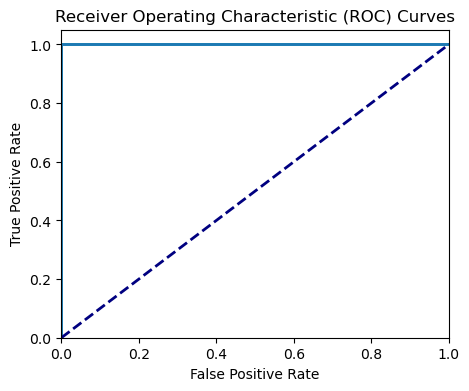

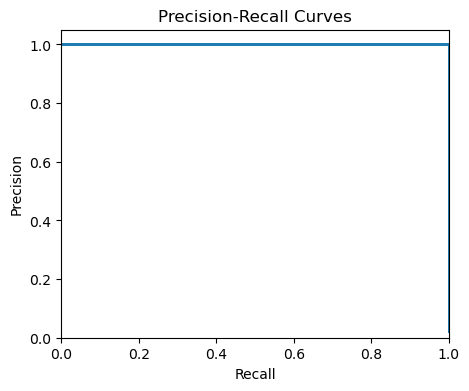

Accuracy: 1.0000
Macro F1 Score: 1.0000
Macro Precision: 1.0000
Macro Recall: 1.0000

Class-wise performance metrics:
(vertigo) Paroymsal  Positional Vertigo:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

AIDS:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Acne:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Alcoholic hepatitis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Allergy:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Arthritis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Bronchial Asthma:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Cervical spondylosis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Chicken pox:

In [7]:
lr_model = joblib.load('/usr4/ugrad/spuduch/zebraMD/Model/saved_models/l1_lr_model.joblib')

evaluate_model(lr_model, X_test, y_test, le)

# XGBoost

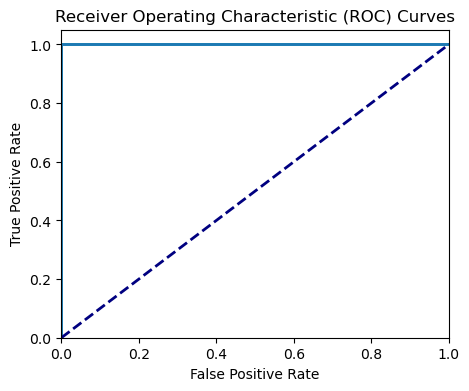

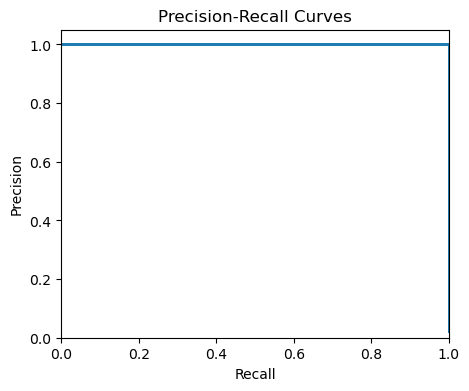

Accuracy: 1.0000
Macro F1 Score: 1.0000
Macro Precision: 1.0000
Macro Recall: 1.0000

Class-wise performance metrics:
(vertigo) Paroymsal  Positional Vertigo:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

AIDS:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Acne:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Alcoholic hepatitis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Allergy:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Arthritis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Bronchial Asthma:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Cervical spondylosis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Chicken pox:

In [8]:
xgb_model = joblib.load('/usr4/ugrad/spuduch/zebraMD/Model/saved_models/xgboost_model.joblib')

evaluate_model(xgb_model, X_test, y_test, le)

# Neural Net

In [9]:
import torch
import os
import sys
current_dir = os.getcwd()

# Go up one directory to reach the project root
project_root = os.path.dirname(current_dir)

# Add the project root to the Python path
sys.path.insert(0, project_root)

# Now you can import from your Model directory
from Model.nn import SimpleNN

# load model
state_dict = torch.load('/usr4/ugrad/spuduch/zebraMD/Model/saved_models/nn_model.pth', map_location=torch.device('cpu'))

input_size = state_dict['fc1.weight'].size(1)
hidden_size = state_dict['fc1.weight'].size(0)
num_classes = state_dict['fc2.weight'].size(0)

# Create an instance of your model with the correct sizes
nn_model = SimpleNN(input_size, hidden_size, num_classes)

# Load the state dict into your model
nn_model.load_state_dict(state_dict)


/scratch/9591770.1.cbm.q/ipykernel_2911836/2149676760.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('/usr4/ugrad/spuduch/zebraMD/Model/saved_m

<All keys matched successfully>

In [10]:
nn_model.eval()
nn_model

SimpleNN(
  (fc1): Linear(in_features=132, out_features=194, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=194, out_features=41, bias=True)
)

In [11]:
# turn X_test to a tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

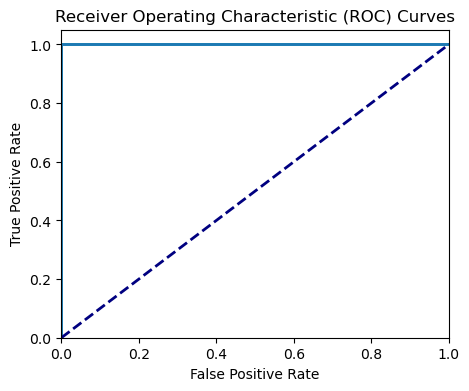

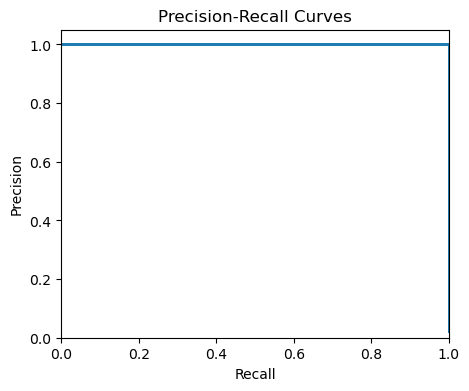

Accuracy: 1.0000
Macro F1 Score: 1.0000
Macro Precision: 1.0000
Macro Recall: 1.0000

Class-wise performance metrics:
(vertigo) Paroymsal  Positional Vertigo:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

AIDS:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Acne:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Alcoholic hepatitis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Allergy:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Arthritis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Bronchial Asthma:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Cervical spondylosis:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  ROC AUC: 1.0000
  PR AUC: 1.0000

Chicken pox:

In [14]:
evaluate_model(nn_model, X_test_tensor, y_test, le)